In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='Malgun Gothic')

import datasets

In [ ]:
df_lesson_page = datasets.enter.lesson_page()
df_complete_lesson = datasets.complete.lesson()
df_click_lesson_question = datasets.click.lesson_page_related_question_box()

c:\Users\soom0\OneDrive\바탕 화면\정수민\코드잇\스프린트 미션\프로젝트 2\intermediate_project\datasets.py:132: DtypeWarning: Columns (10,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [ ]:
# 로그 시간 date time 형식으로 변환
df_lesson_page['client_event_time'] = pd.to_datetime(df_lesson_page['client_event_time'])
df_complete_lesson['client_event_time'] = pd.to_datetime(df_complete_lesson['client_event_time'])
df_click_lesson_question['client_event_time'] = pd.to_datetime(df_click_lesson_question['client_event_time'])

In [ ]:
# # 중복 제거
# df_lesson_page.drop_duplicates(inplace=True)
# df_complete_lesson.drop_duplicates(inplace=True)
# df_click_lesson_question.drop_duplicates(inplace=True)

# # 컬럼 .  _ 으로 변경
# df_lesson_page.columns = df_lesson_page.columns.str.replace('.', '_')
# df_complete_lesson.columns = df_complete_lesson.columns.str.replace('.', '_')
# df_click_lesson_question.columns = df_click_lesson_question.columns.str.replace('.', '_')

# # 날짜 정리
# df_lesson_page = df_lesson_page[df_lesson_page['client_event_time'].dt.year.isin([2022, 2023])]
# df_complete_lesson = df_complete_lesson[df_complete_lesson['client_event_time'].dt.year.isin([2022, 2023])]
# df_click_lesson_question = df_click_lesson_question[df_click_lesson_question['client_event_time'].dt.year.isin([2022, 2023])]

# # 기초 처리 저장
# df_lesson_page.to_csv('./data/enter.lesson_page.csv',encoding='UTF-8')
# df_complete_lesson.to_csv('./data/complete.lesson.csv',encoding='UTF-8')
# df_click_lesson_question.to_csv('./data/click.lesson_page_related_question_box.csv',encoding='UTF-8')

In [ ]:
# 데이터 시간 범위 확인
print("df_lesson_page:")
print("Min:", df_lesson_page['client_event_time'].min())
print("Max:", df_lesson_page['client_event_time'].max())

print("\ndf_complete_lesson:")
print("Min:", df_complete_lesson['client_event_time'].min())
print("Max:", df_complete_lesson['client_event_time'].max())

print("\ndf_click_lesson_question:")
print("Min:", df_click_lesson_question['client_event_time'].min())
print("Max:", df_click_lesson_question['client_event_time'].max())

df_lesson_page:
Min: 2022-01-01 00:01:34.047000
Max: 2023-12-31 23:58:48.291000

df_complete_lesson:
Min: 2022-01-01 00:00:01.181000
Max: 2023-12-31 23:59:35.209000

df_click_lesson_comment:
Min: 2022-01-01 00:08:23.144000
Max: 2023-12-31 23:51:45.529000


In [ ]:
df_lesson_page.head(4)

,Unnamed: 0,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
0,0,Wonju,2023-04-05 21:46:04.333,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,1,Wonju,2023-04-05 21:55:50.787,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,2,Wonju,2023-04-05 21:55:55.684,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,3,Dongdaemun-gu,2023-04-05 21:04:55.828,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN


In [ ]:
df_lesson_page

In [ ]:
# 데이터 중복 검정
df_complete_lesson.loc[df_complete_lesson.duplicated(subset=['user_id','lesson_id'])]

,Unnamed: 0,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
6629,6629,Seoul,2023-02-28 07:15:25.017,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,110.0.0.0,Web,edb5c96dda1f5a392eef2c68abc1fd82,db43a841c994231e2795d4df8931af50,821b9016b01ea957ce648355c81c7844
6630,6630,Seoul,2023-02-28 07:15:28.347,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,110.0.0.0,Web,edb5c96dda1f5a392eef2c68abc1fd82,db43a841c994231e2795d4df8931af50,821b9016b01ea957ce648355c81c7844
7155,7155,Geumcheon-gu,2023-01-30 12:23:15.171,South Korea,NaN,Mac,Mac,complete.lesson,Korean,Chrome,107.0.0.0,Web,a2e67e25ee8740901ffac3e00b188224,5cea8d6e02eb18b2660f98f424867e4d,481d4733ef7bb1596c98baa66e1f8b85
9985,9985,Anyang-si,2023-02-08 02:25:05.192,South Korea,NaN,Linux,Linux,complete.lesson,Korean,Chrome,91.0.4472.101,Web,3e81f1a3dbab7a66b91c925dbd52fd76,db1819d3a7a4c4d85dccb3b9e982fbcd,5cd2907f9eee8fd0c7a632d32c026c17
21503,21503,Pyeongtaek-si,2023-04-08 04:32:40.539,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,718ad7cc4d954d166cea2b235651afdb,4641438a6c81ef572d997dbdc9100f8b,82edfa8d6d4bed30627c0a5237f180b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404772,5404777,Dongdaemun-gu,2023-10-10 05:08:32.238,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,116.0.0.0,Web,9fe4efb5bffac9728392d3774c0894f7,f64c475280676531a31f2f8e0648599c,b424a5814e096b758b1dc18b9f2192ad
5404773,5404778,Dongdaemun-gu,2023-10-10 05:11:12.885,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,116.0.0.0,Web,9fe4efb5bffac9728392d3774c0894f7,f64c475280676531a31f2f8e0648599c,c56fc2664d26120115338308af97dd62
5404964,5404969,Pyeong,2023-10-10 05:12:14.696,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,125413a55b9a437dff5aa502201bd2ea,4641438a6c81ef572d997dbdc9100f8b,93e5fc592668b76c80cd2da683a864bf
5404966,5404971,Pyeong,2023-10-10 05:42:26.181,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,125413a55b9a437dff5aa502201bd2ea,4641438a6c81ef572d997dbdc9100f8b,2b050a1dc887f883c2e8a6de8c6ca93f


In [30]:
# 데이터 중복 해결
df_complete_lesson = df_complete_lesson.drop_duplicates(subset=['user_id','lesson_id'],keep='first')

In [ ]:
df_click_lesson_question.isna().sum()

Unnamed: 0                 0
city                   23461
client_event_time          0
country                14891
device_carrier       1378910
device_family              1
device_type             6334
event_type                 0
language                   0
os_name                    1
os_version               213
platform                   0
user_id                52903
question_id           554146
content_id            554147
lesson_id             554146
dtype: int64

In [ ]:
df_click_lesson_question.shape

(1378910, 16)

In [33]:
# 월별 이용자수 추이 확인
monthly_users_enter_lesson = df_lesson_page.resample('ME', on='client_event_time')['user_id'].count()
# 인덱스를 month로, %Y-%m 형태로 변환
monthly_users_enter_lesson.index = monthly_users_enter_lesson.index.strftime('%Y-%m')
monthly_users_enter_lesson.index.name = 'month'
# 결과 출력
print(monthly_users_enter_lesson)

month
2022-01     543870
2022-02     448898
2022-03     857506
2022-04     389295
2022-05     477087
2022-06     420442
2022-07     429826
2022-08     654906
2022-09     467820
2022-10     376186
2022-11     942973
2022-12    1322440
2023-01    1393717
2023-02    1053065
2023-03    1062911
2023-04    1133429
2023-05    1094870
2023-06    1007832
2023-07    1259268
2023-08    1187780
2023-09    1083378
2023-10    1094257
2023-11     703404
2023-12      84863
Name: user_id, dtype: int64


In [34]:
# 월별 이용자수 추이 확인
monthly_users_complete_lesson = df_complete_lesson.resample('ME', on='client_event_time')['user_id'].count()
# 인덱스를 month로, %Y-%m 형태로 변환
monthly_users_complete_lesson.index = monthly_users_complete_lesson.index.strftime('%Y-%m')
monthly_users_complete_lesson.index.name = 'month'
# 결과 출력
print(monthly_users_complete_lesson)

month
2022-01    253136
2022-02    199538
2022-03    201973
2022-04    172297
2022-05    173541
2022-06    175196
2022-07    189040
2022-08    225287
2022-09    187311
2022-10    199708
2022-11    191452
2022-12    237194
2023-01    298721
2023-02    219779
2023-03    198930
2023-04    220473
2023-05    202742
2023-06    183167
2023-07    295128
2023-08    282770
2023-09    252554
2023-10    245733
2023-11    272852
2023-12    284364
Name: user_id, dtype: int64


In [ ]:
# 월별 이용자수 추이 확인
monthly_users_lesson_question = df_click_lesson_question.resample('ME', on='client_event_time')['user_id'].count()
# 인덱스를 month로, %Y-%m 형태로 변환
monthly_users_lesson_question.index = monthly_users_lesson_question.index.strftime('%Y-%m')
monthly_users_lesson_question.index.name = 'month'

# 결과 출력
print(monthly_users_lesson_question)

month
2022-01    229868
2022-02    175087
2022-03    156328
2022-04     53347
2022-05     52431
2022-06     49635
2022-07     48208
2022-08     46695
2022-09     34457
2022-10     34369
2022-11     37045
2022-12     26404
2023-01     51098
2023-02     42352
2023-03     36196
2023-04     31743
2023-05     26453
2023-06     25513
2023-07     31069
2023-08     30330
2023-09     26416
2023-10     25288
2023-11     28176
2023-12     27499
Name: user_id, dtype: int64


In [ ]:
# 컬럼명 수정
monthly_users_enter_lesson = monthly_users_enter_lesson.reset_index().rename(columns={'user_id':'enter_count'})
monthly_users_complete_lesson = monthly_users_complete_lesson.reset_index().rename(columns={'user_id':'complete_count'})
monthly_users_lesson_question = monthly_users_lesson_question.reset_index().rename(columns={'user_id':'question_count'})


In [ ]:
# 데이터프레임 병합
merged_df = pd.merge(monthly_users_enter_lesson, monthly_users_complete_lesson, on='month')
merged_df = pd.merge(merged_df, monthly_users_lesson_question, on='month')

# 결과 출력
display(merged_df)

NameError: name 'monthly_users_enter_lesson' is not defined

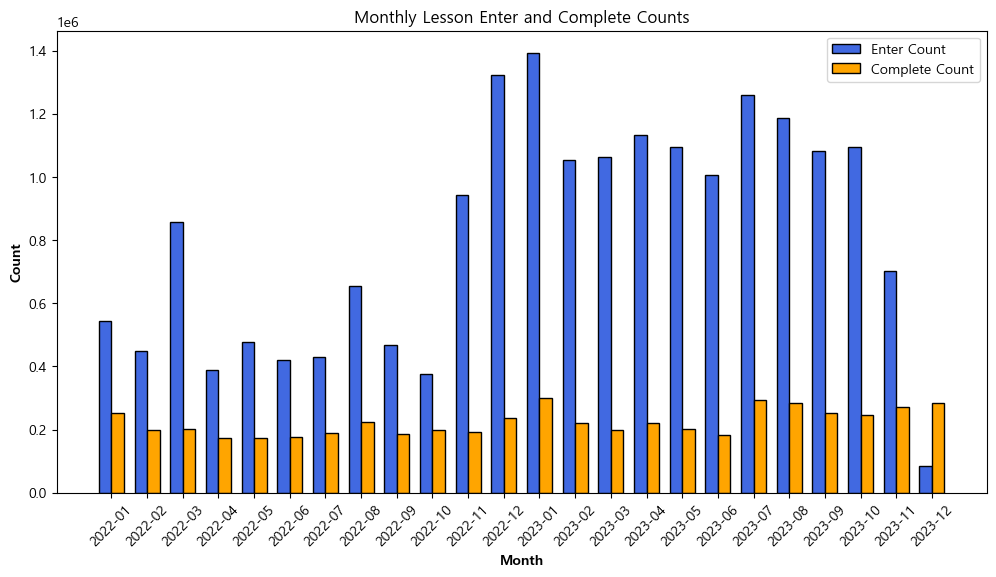

In [38]:
# 플롯그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 바 넓이 설정
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(merged_df['month']))
r2 = [x + bar_width for x in r1]

# 바 그리기
ax.bar(r1, merged_df['enter_count'], color='royalblue', width=bar_width, edgecolor='black', label='Enter Count')
ax.bar(r2, merged_df['complete_count'], color='orange', width=bar_width, edgecolor='black', label='Complete Count')

# 라벨 붙이기
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Monthly Lesson Enter and Complete Counts')
ax.set_xticks([r + bar_width/2 for r in range(len(merged_df['month']))])
ax.set_xticklabels(merged_df['month'], rotation=45)

# 레전드 붙이기
ax.legend()

# 그래프 그리기
plt.show()

In [ ]:
# 할당 해제
del monthly_users_enter_lesson
del monthly_users_lesson_question
del monthly_users_complete_lesson

In [ ]:
# lesson_id별로 count 계산
lesson_page_counts = df_lesson_page.groupby('lesson_id')['user_id'].size().reset_index(name='enter_count')
complete_lesson_counts = df_complete_lesson.groupby('lesson_id')['user_id'].size().reset_index(name='complete_count')
click_lesson_question_counts = df_click_lesson_question.groupby('lesson_id')['user_id'].size().reset_index(name='click_question_count')

merged_df = pd.merge(lesson_page_counts,complete_lesson_counts, on='lesson_id',how='outer')
merged_df = pd.merge(merged_df, click_lesson_question_counts, on='lesson_id',how='outer')


In [82]:
merged_df.shape

(5488, 4)

In [91]:
merged_df = merged_df.fillna(0)

In [92]:
# 0으로 나누어지는 케이스를 분기시켜 처리.
# merged_df['complete/enter'] = np.where(
#     merged_df['enter_count'] == 0, 999,
#     round(merged_df['complete_count'] / merged_df['enter_count'] * 100, 2)
# )

# 분자와 분모에 1씩 더해서 나누기.
merged_df['complete/enter'] = round((merged_df['complete_count']+1) / (merged_df['enter_count']+1) * 100, 2)

In [93]:
merged_df.loc[merged_df['complete/enter'] > 100].sort_values(by='complete/enter')

,lesson_id,enter_count,complete_count,click comment_count,complete/enter
801,269bb05888148ac0b4a4c1482fec2db7,813.0,816.0,56.0,100.37
89,04d9be0502cd599180de5130e928ae5f,804.0,808.0,93.0,100.50
2314,6a623f5f1047e30d915b7693da6fe90e,187.0,188.0,3.0,100.53
3697,ad2c71b9a0faea88734da4c01a47b763,179.0,180.0,0.0,100.56
2683,7cf1494f89fcbb7dcef0a1ef1aed2934,142.0,143.0,0.0,100.70
...,...,...,...,...,...
558,1be4c06a09189ff1d5498d4ec8ab9715,3.0,101.0,0.0,2550.00
1283,3e129a32e2719f3b820770969ca1c22b,3.0,103.0,0.0,2600.00
3842,b358766ea99c4ffeb79ea7aa7fc6bfc4,0.0,38.0,0.0,3900.00
3467,a2416dec35d06e1647aa2f126d653e15,0.0,39.0,0.0,4000.00


In [95]:
# complete/enter를 0~10, 10~20, ..., 100 이상으로 분할
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']
merged_df['complete/enter_group'] = pd.cut(merged_df['complete/enter'], bins=bins, labels=labels, right=True)

# 각 그룹에 몇 개의 행들이 포함되어 있는지 count
group_counts = merged_df['complete/enter_group'].value_counts().sort_index()

# 결과 출력
print(group_counts)

complete/enter_group
0-10       323
10-20     1114
20-30      774
30-40     1268
40-50     1319
50-60      184
60-70       59
70-80       54
80-90       65
90-100      65
100+       263
Name: count, dtype: int64


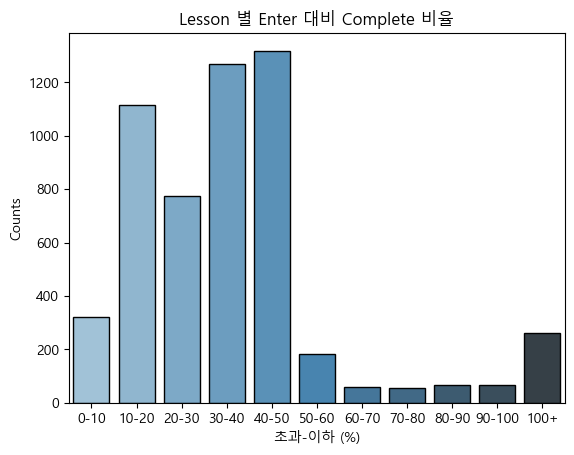

In [102]:
# 바 그래프 그리기
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, legend=False, palette='Blues_d', edgecolor='black')

plt.title("Lesson 별 Enter 대비 Complete 비율")
plt.ylabel("Counts")
plt.xlabel("초과-이하 (%)")
# 그래프 그리기
plt.show()

In [ ]:
merged_df.groupby('complete/enter_group')['click question_count'].mean()

C:\Users\soom0\AppData\Local\Temp\ipykernel_19212\351237310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('complete/enter_group')['click comment_count'].mean()


complete/enter_group
0-10      119.857585
10-20     340.730700
20-30     147.691214
30-40     138.057571
40-50      71.616376
50-60      89.135870
60-70      13.406780
70-80      29.000000
80-90      15.123077
90-100     11.615385
100+        8.167300
Name: click comment_count, dtype: float64

C:\Users\soom0\AppData\Local\Temp\ipykernel_19212\3913100353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean_click_comment = merged_df.groupby('complete/enter_group')['click comment_count'].mean().reset_index()


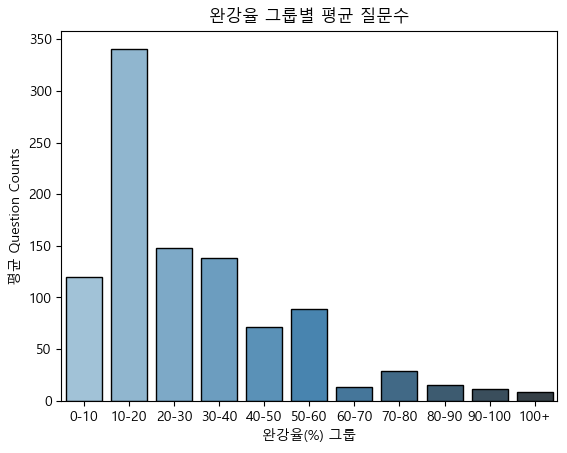

In [ ]:
# 그룹별 click question_count의 평균 계산
group_mean_click_question = merged_df.groupby('complete/enter_group')['click question_count'].mean().reset_index()

# 바 그래프 그리기
sns.barplot(x='complete/enter_group', y='click question_count', data=group_mean_click_question, palette='Blues_d', hue='complete/enter_group', legend=False, edgecolor='black')

plt.title("완강율 그룹별 평균 질문 클릭수")
plt.ylabel("평균 Question Counts")
plt.xlabel("완강율(%) 그룹")
# 그래프 그리기
plt.show()

C:\Users\soom0\AppData\Local\Temp\ipykernel_19212\2992938190.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean_click_enter = merged_df.groupby('complete/enter_group')['click/enter'].mean().reset_index()
C:\Users\soom0\AppData\Local\Temp\ipykernel_19212\2992938190.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean_click_complete = merged_df.groupby('complete/enter_group')['click/complete'].mean().reset_index()


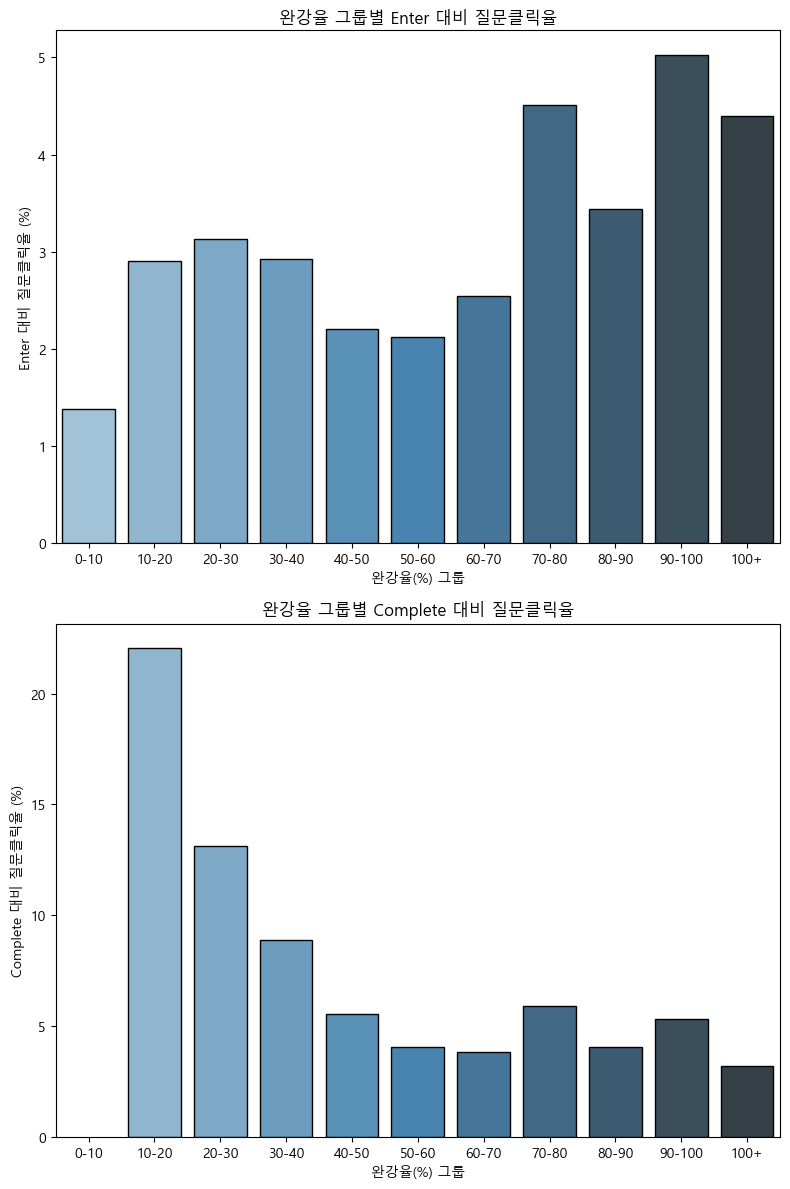

In [ ]:
# Enter 대비 질문수 백분율 계산
merged_df['click/enter'] = round((merged_df['click question_count'] / merged_df['enter_count']) * 100, 2)

# Complete 대비 질문수 백분율 계산
merged_df['click/complete'] = round((merged_df['click question_count'] / merged_df['complete_count']) * 100, 2)

# 그룹별 평균 계산
group_mean_click_enter = merged_df.groupby('complete/enter_group')['click/enter'].mean().reset_index()
group_mean_click_complete = merged_df.groupby('complete/enter_group')['click/complete'].mean().reset_index()

# 그래프 그리기
fig, ax = plt.subplots(2, 1, figsize=(8, 12))

# Enter 대비 질문수 백분율 바 그래프
sns.barplot(x='complete/enter_group', y='click/enter', data=group_mean_click_enter, palette='Blues_d', hue='complete/enter_group', ax=ax[0], edgecolor='black')
ax[0].set_title("완강율 그룹별 Enter 대비 질문클릭율")
ax[0].set_ylabel("Enter 대비 질문클릭율 (%)")
ax[0].set_xlabel("완강율(%) 그룹")

# Complete 대비 질문수 백분율 바 그래프
sns.barplot(x='complete/enter_group', y='click/complete', data=group_mean_click_complete, palette='Blues_d', hue='complete/enter_group', ax=ax[1], edgecolor='black')
ax[1].set_title("완강율 그룹별 Complete 대비 질문클릭율")
ax[1].set_ylabel("Complete 대비 질문클릭율 (%)")
ax[1].set_xlabel("완강율(%) 그룹")

# 그래프 그리기
plt.tight_layout()
plt.show()

In [117]:
start_content = datasets.start.content()
start_content.columns = start_content.columns.str.replace('.', '_')

In [118]:
start_content.head(4)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
0,Daejeon,2023-04-05 21:14:39.906000,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674000,South Korea,NaN,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585000,South Korea,NaN,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040000,Canada,NaN,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner


In [123]:
start_content = start_content[['content_id','content_difficulty']]

In [126]:
del merged_df

In [124]:
# complete_lesson에서 content_id 컬럼을 가져와 merged_df와 lesson_id 기준으로 병합
merged_df = pd.merge(merged_df, df_complete_lesson[['lesson_id', 'content_id']], on='lesson_id', how='left')

# start_content 데이터프레임을 content_id 기준으로 병합
merged_df = pd.merge(merged_df, start_content, on='content_id', how='left')

# 결과 출력
display(merged_df)

MemoryError: Unable to allocate 146. GiB for an array with shape (19606791199,) and data type int64